# Download Mask-RCNN

In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/baires/image_segmentation/

/content/drive/MyDrive/baires/image_segmentation


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
%pwd

'/content/drive/MyDrive/baires/image_segmentation'

In [ ]:
%ls -a

data/  .gitignore  outputs/          parte2_mask-rcnn.ipynb
.git/  Mask_RCNN/  parte1_pdi.ipynb  README.md


In [ ]:
%cd Mask_RCNN/

/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN


In [ ]:
%pwd

'/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN'

In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
%cd ..

/content/drive/MyDrive/baires/image_segmentation


In [ ]:
%pwd

'/content/drive/MyDrive/baires/image_segmentation'

## Import Libraries

In [ ]:
import os
import sys 
import math
import random

import cv2
import skimage.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 12.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
!pip install tensorflow==1.15.2
!pip install tensorflow-gpu==1.15.0
!pip install q keras==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 37 kB/s 
     |████████████████████████████████| 503 kB 47.1 MB/s 
     |████████████████████████████████| 3.8 MB 49.8 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7555 sha256=1a48b6955c6ba37e0371098ebeb4f242e6f12724f710680954c9ac854eb98c91
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [ ]:
import tensorflow as tf

tf.__version__

'1.15.0'

In [ ]:
ROOT_DIR = os.path.abspath('./Mask_RCNN')
ROOT_DIR

'/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN'

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append(ROOT_DIR)
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN']

In [ ]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

Using TensorFlow backend.


In [ ]:
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN',
 '/content/drive/MyDrive/baires',
 '/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN/samples/coco/']

In [ ]:
import coco

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

print(MODEL_DIR, IMAGE_DIR)

/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN/logs /content/drive/MyDrive/baires/image_segmentation/Mask_RCNN/images


# Load pre-trained model

In [ ]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [ ]:
COCO_MODEL_PATH

'/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN/mask_rcnn_coco.h5'

In [ ]:
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Inference

In [ ]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

# Create model and load weights

In [ ]:
MODEL_DIR

'/content/drive/MyDrive/baires/image_segmentation/Mask_RCNN/logs'

In [ ]:
model = modellib.MaskRCNN(mode = 'inference', config = config, model_dir = MODEL_DIR)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
model.load_weights(COCO_MODEL_PATH, by_name=True)

# Class names

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'brocoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'
               ]

In [ ]:
len(class_names)

81

In [ ]:
class_names[5]

'airplane'

In [ ]:
class_names.index('airplane')

5

# Prediction

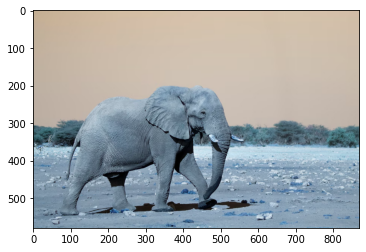

In [ ]:
img = cv2.imread('data/fotos/elefante.jpg')
plt.imshow(img)
plt.show()

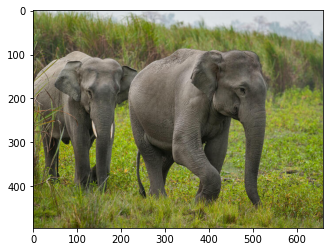

In [ ]:
from skimage.io import imread

img = imread('data/fotos/test_elefantes.jpeg')
plt.imshow(img)
plt.show()

In [ ]:
resultados = model.detect([img], verbose=0)

In [ ]:
resultados

[{'rois': array([[ 86, 216, 458, 540],
         [ 94,   0, 414, 242]], dtype=int32),
  'class_ids': array([21, 21], dtype=int32),
  'scores': array([0.9999579 , 0.99994695], dtype=float32),
  'masks': array([[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         ...,
  
         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],
  
         [[False, False],
          [False, False],
          [False, False],
      

In [ ]:
r = resultados[0]
r

{'rois': array([[ 86, 216, 458, 540],
        [ 94,   0, 414, 242]], dtype=int32),
 'class_ids': array([21, 21], dtype=int32),
 'scores': array([0.9999579 , 0.99994695], dtype=float32),
 'masks': array([[[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],
 
        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],
 
        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],
 
        ...,
 
        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
         [False, False],
         [False, False]],
 
        [[False, False],
         [False, False],
         [False, False],
         ...,
         [False, False],
        

In [ ]:
print(r['class_ids'])

[21 21]


In [ ]:
class_names.index('elephant')

21

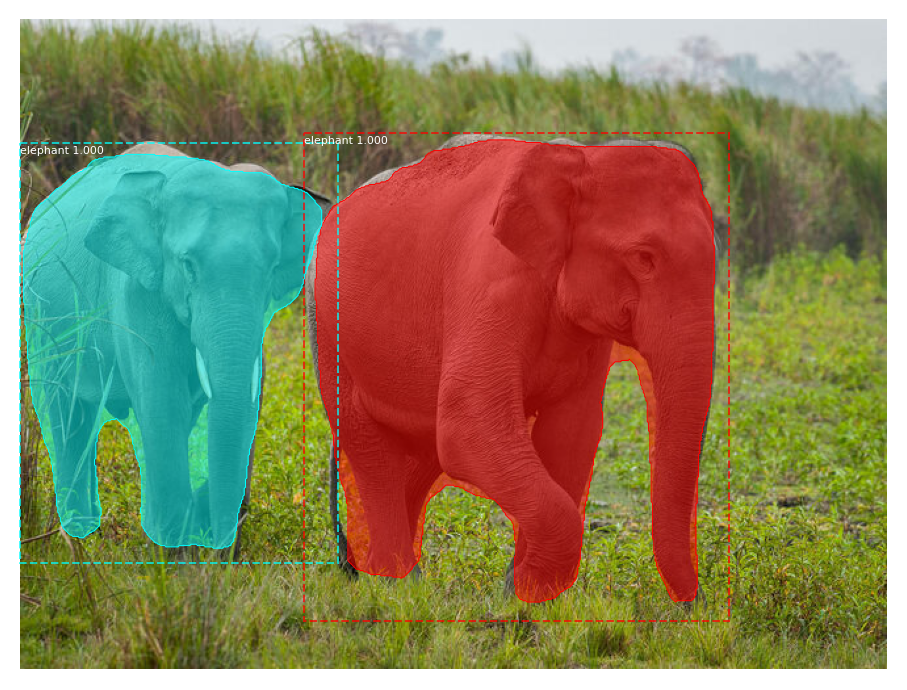

In [ ]:
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [ ]:
print('Segmentos detectados:', str(len(r['scores'])))

Segmentos detectados: 2


In [ ]:
r['scores']

array([0.9999579 , 0.99994695], dtype=float32)